In [145]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
img = cv2.imread('D:\\Python projects\\Machine Learning models\\Cat breed\\test_images\\test2.jpg')
img.shape

(600, 400, 3)

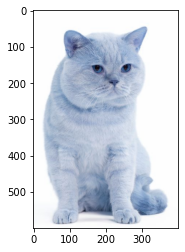

In [147]:
plt.imshow(img)

In [148]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(600, 400)

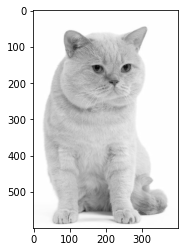

In [149]:
plt.imshow(gray,cmap='gray')

In [150]:
face_cascade = cv2.CascadeClassifier('D:\\Python projects\\Machine Learning models\\Cat breed\\opencv\\haarcascades\\haarcascade_frontalcatface_extended.xml')
eye_cascade = cv2.CascadeClassifier('D:\\Python projects\\Machine Learning models\\Cat breed\\opencv\\haarcascades\\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[114,  81, 200, 200]])

In [151]:
(x,y,w,h) = faces[0]
x,y,w,h

(114, 81, 200, 200)

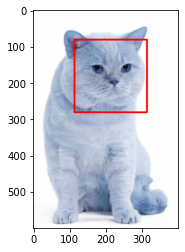

In [152]:
face_image = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)
plt.imshow(face_image)

## ROI is region of interest

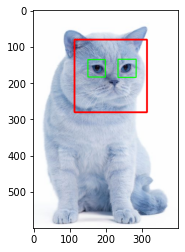

In [153]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)      #Rectangle arounf eyes is in green colour
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

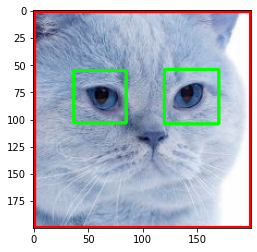

In [154]:
plt.imshow(roi_color, cmap='gray')

## We are not drawing a rectangle here, we are just finding out the region of interest based on the number of eyes. The above steps are followed but only in the form of a function, where we are taking the path of the image as an input

In [155]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]         #Follows height, width convention
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

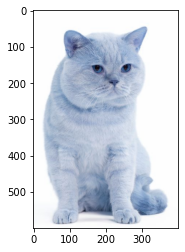

In [156]:
original_image = cv2.imread('D:\\Python projects\\Machine Learning models\\Cat breed\\test_images\\test2.jpg')
plt.imshow(original_image)

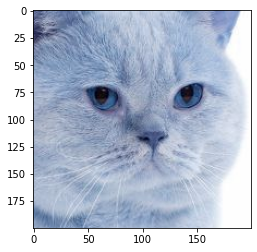

In [157]:
cropped_img = get_cropped_image_if_2_eyes('D:\\Python projects\\Machine Learning models\\Cat breed\\test_images\\test2.jpg')
plt.imshow(cropped_img)

In [158]:
path_to_data = 'D:\\Python projects\\Machine Learning models\\Cat breed\\Cat breed classifier'
path_to_cr_data = 'D:\\Python projects\\Machine Learning models\\Cat breed\\Cat breed classifier\\cropped'

In [159]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [160]:
img_dirs

['D:\\Python projects\\Machine Learning models\\Cat breed\\Cat breed classifier\\British Short Hair',
 'D:\\Python projects\\Machine Learning models\\Cat breed\\Cat breed classifier\\Manx cat',
 'D:\\Python projects\\Machine Learning models\\Cat breed\\Cat breed classifier\\Persian Cat',
 'D:\\Python projects\\Machine Learning models\\Cat breed\\Cat breed classifier\\Siamese cat',
 'D:\\Python projects\\Machine Learning models\\Cat breed\\Cat breed classifier\\Sphynx cat']

In [161]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

# The code above makes a new folder named cropped, if it already exists, it deletes it and creates a new one

In [162]:
cropped_image_dirs = []
cat_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    cat_name = img_dir.split('\\')[-1]
    print(cat_name)
    
    cat_file_names_dict[cat_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + '\\' + cat_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = cat_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            cat_file_names_dict[cat_name].append(cropped_file_path)
            count += 1

British Short Hair
Generating cropped images in folder:  D:\Python projects\Machine Learning models\Cat breed\Cat breed classifier\cropped\British Short Hair
Manx cat
Generating cropped images in folder:  D:\Python projects\Machine Learning models\Cat breed\Cat breed classifier\cropped\Manx cat
Persian Cat
Generating cropped images in folder:  D:\Python projects\Machine Learning models\Cat breed\Cat breed classifier\cropped\Persian Cat
Siamese cat
Generating cropped images in folder:  D:\Python projects\Machine Learning models\Cat breed\Cat breed classifier\cropped\Siamese cat
Sphynx cat
Generating cropped images in folder:  D:\Python projects\Machine Learning models\Cat breed\Cat breed classifier\cropped\Sphynx cat


# Manual cleaning is NECESSARILY required after this step, before training and testing our model

# Wavelet is a rapidly decaying wave-like oscillation that has zero mean, it only exists for a finite duration

In [163]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

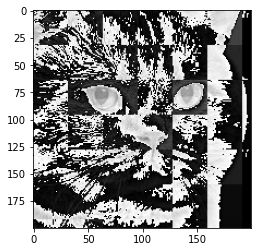

In [164]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [165]:
class_dict = {}
count = 0
for cat_name in cat_file_names_dict.keys():
    class_dict[cat_name] = count
    count = count + 1
try:
    class_dict.pop('cropped')
except:
    pass
class_dict

{'British Short Hair': 0,
 'Manx cat': 1,
 'Persian Cat': 2,
 'Siamese cat': 3,
 'Sphynx cat': 4}

In [166]:
X, y = [], []
for cat_name, training_files in cat_file_names_dict.items():
    for training_image in training_files:
        
        img = cv2.imread(training_image)
        
        #Images can be of diff size, but we need the same size,therefore rescaling
        
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (30, 30))      
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har, (30, 30))
        
        #We are vertically stacking both the images using numpy
        # *3 is there because the raw iamge is colored (RGB) 
        
        combined_img = np.vstack((scaled_raw_img.reshape(30*30*3,1),scaled_img_har.reshape(30*30,1)))
        X.append(combined_img)
        y.append(class_dict[cat_name])  

In [167]:
len(X)

41

In [168]:
len(X[0])

3600

In [169]:
30*30*3 + 30*30*1

3600

In [170]:
X = np.array(X).reshape(len(X),3600).astype(float)
X.shape

(41, 3600)

In [171]:
X[0]

array([161., 157., 169., ...,   2., 251., 221.])

# Model Training (First with SVM)

In [172]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [174]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.45454545454545453

In [175]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.25      0.50      0.33         2
           2       0.00      0.00      0.00         0
           3       1.00      0.38      0.55         8

    accuracy                           0.45        11
   macro avg       0.40      0.47      0.34        11
weighted avg       0.80      0.45      0.50        11



D:\Data_Science\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Data_Science\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Data_Science\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GridSearchCV

In [176]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

## Model params dict: It contains the name of the models as keys, whose value is another dictionary, containing model, parameters as keys

In [177]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

## The idea behind the StandardScaler is that variables that are measured at different scales do not contribute equally to the fit of the model and the learning function of the model and could end up creating a bias. 

## So, to deal with this potential problem, we need to standardize the data (μ = 0, σ = 1) that is typically used before we integrate it into the machine learning model.

## CV=5 is cross validation using 5 folds (for 100, 1-80 for training, rest for testing, then 60-60 for testing and rest for testing etc)

In [178]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=4, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.361607,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.299107,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.294643,{'logisticregression__C': 1}


In [179]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [180]:
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [181]:
best_estimators['svm'].score(X_test,y_test)

0.5454545454545454

In [182]:
best_estimators['random_forest'].score(X_test,y_test)

0.0

In [183]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.45454545454545453

In [184]:
best_clf = best_estimators['svm']

In [185]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 0, 0],
       [0, 4, 1, 3]], dtype=int64)

Text(69.0, 0.5, 'Truth')

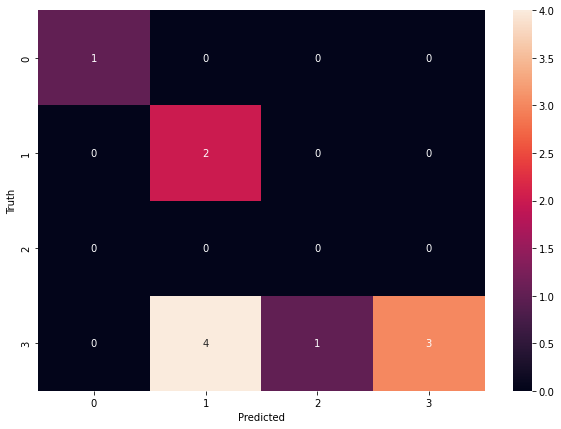

In [186]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [83]:
class_dict

{'British Short Hair': 0,
 'Manx cat': 1,
 'Persian Cat': 2,
 'Siamese cat': 3,
 'Sphynx cat': 4}

## Saving the trained model

In [192]:
import joblib
joblib.dump(best_clf, 'D:\\Python projects\\Machine Learning models\\Cat breed\\saved_model.pkl')

['D:\\Python projects\\Machine Learning models\\Cat breed\\saved_model.pkl']

In [190]:
import json
with open('D:\\Python projects\\Machine Learning models\\Cat breed\\class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))